<a href="https://colab.research.google.com/github/KevinTheRainmaker/ML_DL_Basics/blob/master/HonGong_ML_DL/08_Stochastic_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률적 경사 하강법

### **키워드:** 확률적 경사 하강법, 손실 함수, 에포크

경사 하강법 알고리즘을 이해하고, 대량의 데이터에서 분류 모델을 훈련하는 방법을 알아보자.

In [1]:
# Packages
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

import matplotlib.pyplot as plt

## 점진적 학습

새로운 데이터가 조금씩 추가되는 상황에서, 전체 데이터를 다시 학습시키거나 기존 모델을 폐기하지 않고 새로운 데이터에 대해서만 조금씩 학습함으로써 모델을 업데이트 시키는 방식을 **점진적 학습(또는 온라인 학습)**이라고 한다.

이 방식의 대표적인 알고리즘으로는 **확률적 경사 하강법(Stochastic Gradient Descent)**이 있다.

### 경사 하강법
경사 하강법이란 해당 지점에서 기울기가 최대인 방향으로 조금씩 내려가며 최소지점을 찾아내는 알고리즘이다.

이때 적절한 minimum 값에 빠르고 정확하게 도달하기 위해서는 적절한 간격을 설정하는 것이 중요하며, 이 간격을 **학습율(Learning Rate)**라고 한다.

### 확률적 경사 하강법

확률적 경사 하강법은 이름에서 알 수 있듯이 경사 하강법의 일종이다. 이름에서 '확률적'은 '무작위하게' 라는 뜻으로 이해할 수 있다. 기본적으로 경사 하강법에서 최적의 방향을 찾기 위해서는 훈련 세트를 사용한다. 그런데 이때 전체 훈련 세트를 사용하지 않고 한 개의 샘플만을 랜덤하게 선택하여 최적 기울기 방향을 찾는 방법이 바로 확률적 경사 하강법인 것이다.

확률적 경사 하강법은 훈련 세트에서 랜덤하게 샘플을 선택하여 학습을 진행하며, 훈련 세트 내 전체 샘플을 사용할 때까지 반복적으로 진행한다. 전부 사용했음에도 최적값을 찾지 못했다면, 전체를 다시 훈련 세트로 넣어 최적값에 도달할 때까지 위 과정을 반복한다. 이와 같이 훈련 세트를 한 번 모두 사용하는 과정을 **에포크(Epoch)**라고 하며, 일반적으로 수십, 수백 번의 에포크를 수행한다.

### 배치 경사 하강법

경사 하강법은 잘못된 방향으로 진행될 확률을 줄이기 위해 보통 학습율을 굉장히 작게 설정한다. 만약 조금 더 안정적으로 방향을 설정하는 방식을 원할 경우, 한 개가 아닌 소규모의 샘플을 선택하여 확률적 경사 하강법을 진행하기도 하는데, 이러한 방식을 **미니배치 경사 하강법(Minibatch Gradient Descent)**이라고 한다.

극단적으로 전체 데이터를 사용하는 경우도 있는데, 이를 **배치 경사 하강법(Batch Gradient Descent)**이라고 한다. 전체 데이터를 사용하는만큼 가장 안정적일 수 있으나, 그만큼 리소스 소모가 심하며 대용량의 데이터에서는 제대로 작동하지 않을 수 있다는 단점이 있다.

## 손실 함수

위에서 점진적 학습은 현재 위치에서의 기울기를 기반으로 최적값을 찾는 방법이라고 설명하였다. 이 때의 최적값을 찾아야하는 함수가 **손실 함수(Loss Function)**이다.

손실 함수는 어떤 문제에서 머신러닝 알고리즘이 도출한 값과 실제 값 사이 오차를 구하는 함수이다. 즉 이 값이 작을수록 해당 모델이 정확하다라고 할 수 있다.

머신러닝 알고리즘은 기본적으로 기울기를 기반으로 진행되기 때문에 손실 함수는 미분이 가능해야 한다.

\* 손실함수는 비용 함수(Cost Function)이라고도 한다.

### 로지스틱 손실 함수 (크로스엔트로피 손실 함수)

각 샘플의 예측값과 타깃 클래스의 레이블을 이용하는 손실함수로, 양성 클래스(1)가 타겟일 경우 예측값과 타깃 레이블을 곱하고, 음성 클래스(0)가 타겟일 경우 음성 클래스에 대한 예측값을 양성 클래스에 대한 예측값으로 바꿔 (1-예측값)과 1을 곱한다.

모든 결과값에 음수를 취한 값을 손실로 사용할 수 있다. 예측값에 로그 함수를 취하여 위 과정을 거치면 로지스틱 손실 함수가 된다. 예측값은 0과 1사이 값인데, 여기에 로그를 취할 경우 0에 가까울수록 굉장히 큰 손실을 만들 수 있기 때문에 모델에 미치는 영향을 더욱 크게 만들 수 있다.

## SGDClassifier

### 데이터 준비

In [2]:
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
fish_input = fish[['Weight','Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(fish_input, fish_target, random_state=42)

In [5]:
ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

### 점진적 학습

In [8]:
sc = SGDClassifier(loss='log', max_iter=40, random_state=42) # 로지스틱 손실 함수 / 에포크 10회 수행
sc.fit(train_scaled, y_train)
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.8319327731092437
0.775


`SGDClassifier` 객체를 다시 만들지 않고 점진적 학습을 수행시켜보자.
이때 사용되는 메서드는 `partial_fit()`이며, `fit()` 메서드와 사용 방법은 동일하지만 호출 시 마다 1 에포크씩 이어서 학습할 수 있다.

In [9]:
sc.partial_fit(train_scaled, y_train)
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.907563025210084
0.925


## 에포크와 과대/과소적합

에포크가 너무 적으면 최적값을 미처 찾기도 전에 학습이 끝나버릴 수 있다. 이러한 경우를 과소적합(Underfitting)이라고 한다.

반대로 에포크가 너무 많으면 훈련 세트에 너무 잘 맞아서 오히려 테스트 세트에 대해서는 잘 맞지 않는 현상이 발생할 수 있다. 이를 과대적합(Overfitting)이라고 한다.

### 조기 종료(Early Stopping)

에포크가 많아질수록 훈련 세트에 대한 정확도는 꾸준히 증가한다. 테스트 세트에 대한 정확도 또한 에포크의 증가에 따라 증가하는 경향을 보이지만, 어느 순간부터는 정확도가 낮아지는 순간이 온다. 이 시점이 바로 과대적합이 발생하는 시점으로, 이때 학습을 멈추는 것을 조기 종료라고 한다.

In [10]:
sc = SGDClassifier(loss='log', random_state=42) # num_iter의 default값 1000
train_score = []
test_score = []
classes = np.unique(y_train)

\* `SGDClassifier` 자체에서 파라미터로 `early_stopping`을 지원하긴 하나, 전체적인 수행 방식을 잘 이해하기 위해 위와 같은 방식을 채택하겠다.

In [11]:
for _ in range(300): # partial_fit을 300번 반복 == 300 에포크
  sc.partial_fit(train_scaled, y_train, classes=classes) # fit 없이 partial_fit을 처음부터 사용할때는 classes가 전달되어야 한다
  train_score.append(sc.score(train_scaled, y_train))
  test_score.append(sc.score(test_scaled, y_test)) # 에포크 1회마다 train score와 test score를 저장

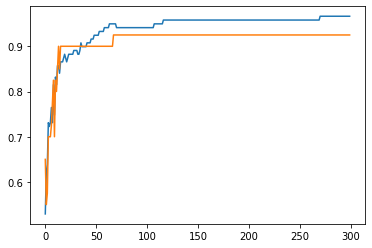

In [12]:
plt.plot(train_score)
plt.plot(test_score)
plt.show()

데이터셋의 크기 자체가 크지 않아 눈에 띄게 드러나는 것은 아니지만, 대략 100 에포크부터 과대적합이 일어남을 확인할 수 있다. 즉, 최적 에포크가 100임을 알 수 있다.

In [13]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42) # tol: None이 아닐 경우 loss > (best_loss - tol)인 시점에 에포크가 종료된다.
sc.fit(train_scaled, y_train)
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.957983193277311
0.925


`SGDClassifier`는 일정 에포크동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춘다. 이는 `tol` 매개변수에 의해 결정되며, `tol`값 이상의 향상이 이루어지지 않을 경우 에포크 반복을 종료하게 된다. 위에서는 `tol`을 None으로 설정하여 100 에포크가 전부 반복되도록 하였다.